<a href="https://colab.research.google.com/github/tinypenguin-Bang/Anomaly-detection/blob/main/python_FFT_example_tinypenguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Amplitude ($Unit$)')

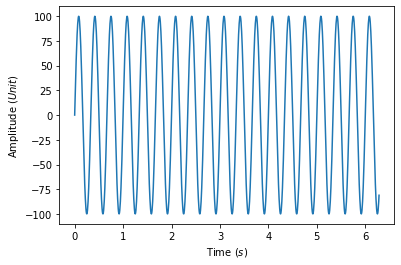

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline --no-import-all

t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 3.0 # Frequency in Hz
A = 100.0 # Amplitude in Unit
s = A * np.sin(2*np.pi*f*t) # Signal

plt.plot(t,s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')

크기 100, 주파수 3의 기본적인 신호를 만들었다. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


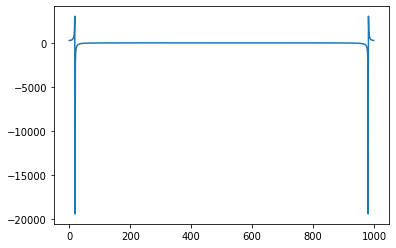

In [ ]:
Y = np.fft.fft(s)
plt.plot(Y)

이 가장 기본적인 신호를 python-numpy의 고속 FFT 알고리즘을 사용하여 이산 퓨리에 변환을 수행하면 위와 같은 데이터를 얻을 수 있다.

In [ ]:
N = int(len(Y)/2+1)
Y[N-2:N+5]

array([35.82792118-1.15972446e-01j, 35.82793066-2.55795385e-13j,
       35.82792118+1.15972446e-01j, 35.82789273+2.31947205e-01j,
       35.8278453 +3.47926591e-01j, 35.8277789 +4.63912918e-01j,
       35.82769352+5.79908501e-01j])

여기서 N은 FFT output의 절반이다. Y데이터에서 임의의 중간 값을 출력해보면, 실수와 허수(j)로 이루어져 있음을 확인할 수 있다. 이를 실수부의 크기만을 이용해 확인해보면

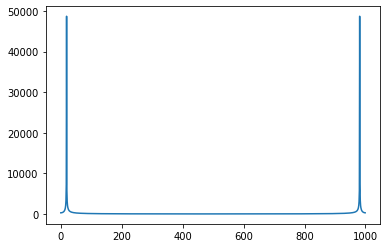

In [ ]:
plt.plot(np.abs(Y))

이와 같은 데이터를 얻을 수 있다.

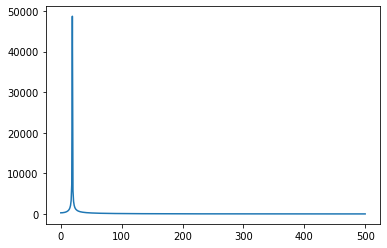

In [ ]:
plt.plot(np.abs(Y[:N]))

N이 FFT 데이터 중 절반이므로, 이는 전체 데이터 중 절반을 가져온 것이다. 이는 Amplitude Spectrum이다.

In [ ]:
dt = t[1] - t[0]
fa = 1.0/dt # scan frequency
print('dt=%.5fs (Sample Time)' % dt)
print('fa=%.2fHz (Frequency)' % fa)

dt=0.00629s (Sample Time)
fa=159.00Hz (Frequency)


이제 X축을 frequency(주파수)로 설정해 보자.

앞에 선언했던 시간축 t의 최소단위를 dt라 하고, 그 기준으로 진동수 최소단위를 fa라 하자.(=Nyquist freq.)

In [ ]:
X = np.linspace(0, fa/2, N, endpoint=True)
X[:4]

array([0.        , 0.15899579, 0.31799158, 0.47698736])

X는 주파수 벡터이므로, FFT 데이터인 Y를 주파수 도메인으로 plot하면 다음과 같다.

Text(0.5, 0, 'Frequency ($Hz$)')

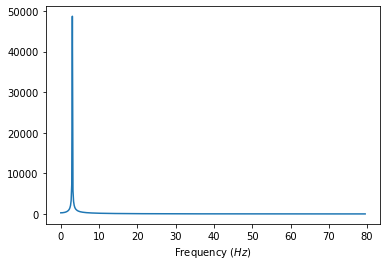

In [ ]:
plt.plot(X, np.abs(Y[:N]))
plt.xlabel('Frequency ($Hz$)')

위의 plot에서의 x축은 frequency이고, 여기에서 sampling frequency fs = 159Hz이다.

따라서 주파수 스펙트럼의 범위는 0.0에서 fa/2인 79.5Hz까지이다. 이제 y축을 설정해보자.

Text(0, 0.5, 'Amplitude ($Unit$)')

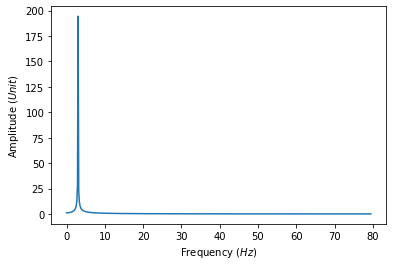

In [ ]:
plt.plot(X, 2.0*np.abs(Y[:N])/N)
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($Unit$)')

abs(Y) 값에 2/N을 곱하여 정규화하면 데이터의 Amplitude(Y축)으로 설정하면 다음과 같다. 

이제 다시 원래의 시그널로 돌아오자.

Text(0, 0.5, 'Amplitude ($Unit$)')

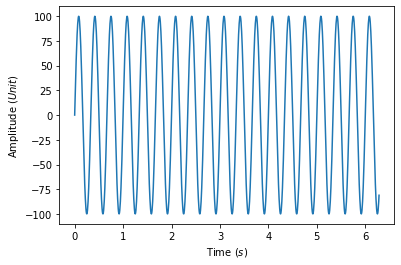

In [ ]:
plt.plot(t,s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')

이 시그널의 마지막에서는 Amplitude가 끊겨 있는데, 이를 확인해보면 아래와 같다.

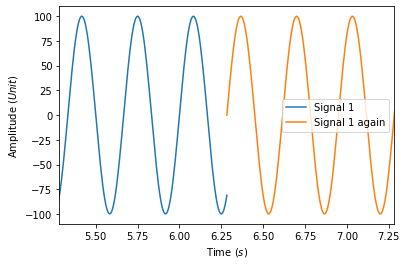

In [ ]:
plt.plot(t, s, label='Signal 1')
plt.plot(t+t[-1], s, label='Signal 1 again')
plt.xlim(t[-1]-1, t[-1]+1)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.legend()

이를 통해, 연속적이지 않고 끊겨 있는(이산적) 데이터도 FFT 알고리즘이 처리할 수 있다는 것을 확인하였다.

이제 Window Function을 이용해 실제 데이터에서 주기적 신호를 얻어 보자.

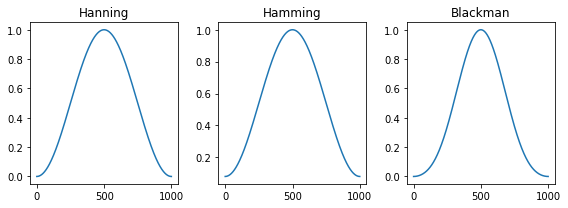

In [ ]:
hann = np.hanning(len(s))
hamm = np.hamming(len(s))
black= np.blackman(len(s))

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(hann)
plt.title('Hanning')
plt.subplot(132)
plt.plot(hamm)
plt.title('Hamming')
plt.subplot(133)
plt.plot(black)
plt.title('Blackman')
plt.tight_layout()

예시로 가져온 Hanning, Hamming, Blackman의 세 Window 함수는 모두 특징이 다르다.

Text(0.5, 1.0, 'Signal with Hamming Window function applied')

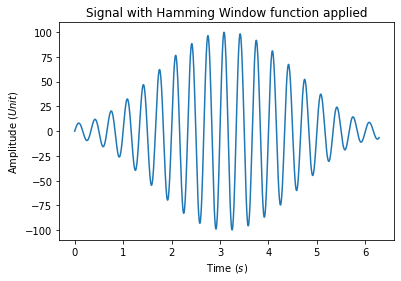

In [ ]:
plt.plot(t,hamm*s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.title('Signal with Hamming Window function applied')

Hamming Window function을 사용해 우리의 기존 시그널 s에 곱하면 위와 같다.

이제 Hamming 함수를 이용하여 Windowed signal의 FFT를 적용해보자.

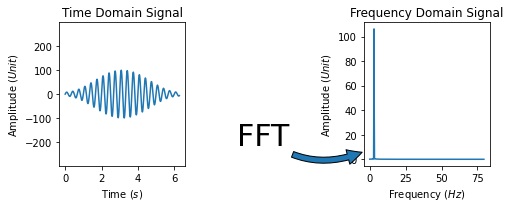

In [ ]:
Yhann = np.fft.fft(hamm*s)

plt.figure(figsize=(7,3))
plt.subplot(121)
plt.plot(t,hamm*s)
plt.title('Time Domain Signal')
plt.ylim(np.min(s)*3, np.max(s)*3)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')

plt.subplot(122)
plt.plot(X, 2.0*np.abs(Yhann[:N])/N)
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($Unit$)')

plt.annotate("FFT",
            xy=(0.0, 0.1), xycoords='axes fraction',
            xytext=(-0.8, 0.2), textcoords='axes fraction',
            size=30, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3"))
plt.tight_layout()

plt.savefig('FFT.png',bbox_inches='tight', dpi=150, transparent=True)

이를 통해, FFT 알고리즘을 사용하면 Windowed signal이 frequency에 영향을 주지 않고, 오직 Amplitude에만 영향을 주어 아주 깔끔하게 정리됨을 확인할 수 있다.